## Load Libraries

In [1]:
import cv2
import itertools
import matplotlib
import skimage.measure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from skimage.feature import greycomatrix, greycoprops
%matplotlib inline 

## Load Images

### List all Folder

In [2]:
image_folders = glob('Dataset/*/')
image_folders

['Dataset\\Apple\\',
 'Dataset\\Grape\\',
 'Dataset\\Lemon\\',
 'Dataset\\Limes\\',
 'Dataset\\Lychee\\',
 'Dataset\\Pear\\']

### List all images in each folder

In [3]:
folder_path = image_folders[0]
folder_name = folder_path.split("\\")[1]
all_image_in_folder = glob(folder_path + "*.jpg")

### List Single Image

In [4]:
img_path = all_image_in_folder[0]
label = folder_name

### Load Single Image

In [5]:
img = cv2.imread(img_path)

### Use OpenCV To Read Image

In [6]:
img = cv2.imread(img_path)

### Remove White Background (Threshold)

In [7]:
def remove_background(img, threshold):
    """
    This method removes background from your image
    
    :param img: cv2 image
    :type img: np.array
    :param threshold: threshold value for cv2.threshold
    :type threshold: float
    :return: RGBA image
    :rtype: np.ndarray
    """
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)
    
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv2.boundingRect(cnt)
    dst = masked_data[y: y + h, x: x + w]

    dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(dst)

    rgba = [r, g, b, alpha]
    dst = cv2.merge(rgba, 4)
    
    dst = cv2.cvtColor(dst, cv2.COLOR_BGRA2RGB)

    return dst

### Display Image

In [8]:
def display(img):
    plt.imshow (img, interpolation = 'nearest')
    _ = plt.axis(False)

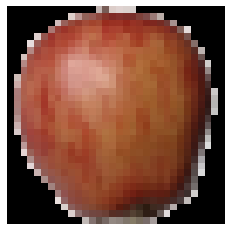

In [9]:
img = cv2.imread(img_path)
img = cv2.resize(img, (32, 32),interpolation = cv2.INTER_AREA)
img = remove_background(img, 225)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("F.jpg", img)
display(img)

### Display Plot Image Grid

In [10]:
def plot_img_grid(images, nb_rows, nb_cols, figsize=(5, 5)):
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)
    
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].imshow(images[n], interpolation = 'nearest')
            axs[i, j].axis('off')
            n += 1       

### Reshape Image

In [11]:
img_arr = np.array(img)
img_flatten = img_arr.reshape(1, -1).T

### Squeeze Array

In [12]:
img_squeeze = np.squeeze(img_flatten)

## Color Features

### Convert Value

In [13]:
# def convert_val_to_rgb(x):
#     if x >= 0 and x < 64:
#         return "00"
#     elif x >= 64 and x < 128:
#         return "55"
#     elif x >= 128 and x < 192:
#         return "AA"
#     else:
#         return "FF"
    
# def convert_val_to_bin(x):
#     if x >= 0 and x < 64:
#         return 0
#     elif x >= 64 and x < 128:
#         return 85
#     elif x >= 128 and x < 192:
#         return 170
#     else:
#         return 255

In [14]:
# def convert_val_to_rgb(x):
#     if x >= 0 and x < 42.5:
#         return "00"
#     elif x >= 42.5 and x < 85:
#         return "33"
#     elif x >= 85 and x < 127.5:
#         return "66"
#     elif x >= 127.5 and x < 170:
#         return "99"
#     elif x >= 170 and x < 212.5:
#         return "CC"
#     else:
#         return "FF" 
    
# def convert_val_to_bin(x):
#     if x >= 0 and x < 42.5:
#         return 42
#     elif x >= 42.5 and x < 85:
#         return 84
#     elif x >= 85 and x < 127.5:
#         return 127
#     elif x >= 127.5 and x < 170:
#         return 169
#     elif x >= 170 and x < 212.5:
#         return 212
#     else:
#         return 255

In [15]:
def convert_val_to_rgb(x):
    if x >= 0 and x < 32:
        return "00"
    elif x >= 32 and x < 64:
        return "24"
    elif x >= 64 and x < 96:
        return "40"
    elif x >= 96 and x < 128:
        return "60"
    elif x >= 128 and x < 160:
        return "80"
    elif x >= 160 and x < 192:
        return "A0"
    elif x >= 192 and x < 224:
        return "C0"
    else:
        return "FF"

def convert_val_to_bin(x):
    if x >= 0 and x < 32:
        return 31
    elif x >= 32 and x < 64:
        return 63
    elif x >= 64 and x < 96:
        return 95
    elif x >= 96 and x < 128:
        return 127
    elif x >= 128 and x < 160:
        return 159
    elif x >= 160 and x < 192:
        return 191
    elif x >= 192 and x < 224:
        return 223
    else:
        return 255

In [16]:
img_convert = np.vectorize(convert_val_to_rgb)(img_squeeze)
# img_squeeze = np.vectorize(convert_val_to_bin)(img_squeeze)

In [17]:
img_2d_arr = img_convert.reshape(-1, 3)

### Convert to List

In [18]:
img_list_arr = img_2d_arr.tolist()

### Convert to String

In [19]:
convert_to_str = lambda x:"#"+"".join(list(map(str, x)))
img_str_arr = [convert_to_str(x) for x in img_list_arr]

### Get Frequency of Unique Values

In [20]:
new_arr = np.array(img_str_arr)
np.unique(new_arr, return_counts=True)

(array(['#000000', '#240000', '#242400', '#242424', '#400000', '#402400',
        '#402424', '#404024', '#404040', '#600000', '#602400', '#602424',
        '#604000', '#604024', '#604040', '#606040', '#606060', '#802400',
        '#802424', '#804000', '#804024', '#804040', '#806040', '#806060',
        '#808060', '#808080', '#A02424', '#A04024', '#A04040', '#A06024',
        '#A06040', '#A06060', '#A08060', '#A08080', '#A0A0A0', '#C06040',
        '#C06060', '#C08040', '#C08060', '#C08080', '#C0A080', '#C0A0A0',
        '#C0C0A0', '#C0C0C0', '#FFA080', '#FFC0C0'], dtype='<U7'),
 array([254,  13,   3,   3,  20,  12,  15,   1,   4,   2,  47,  16,   2,
          3,  11,   1,   5,  11,  36,   7, 162,  25,   4,   7,   1,   3,
          7,  87,  30,  43,  69,   5,   2,   9,   7,   7,  10,   1,  23,
         19,   5,   8,   1,  15,   1,   7], dtype=int64))

### Convert Image to Dictionary

In [21]:
tmp_dict = {a:b for (a,b) in zip(np.unique(new_arr, return_counts=True)[0], np.unique(new_arr, return_counts=True)[1])}

## Pipeline Function

In [22]:
def pipeline_1d(img_path, convert_func, threshold = 225, h = 100, w = 100):
    cv_img = cv2.imread(img_path)
    cv_img = cv2.resize(cv_img, (w,h),interpolation = cv2.INTER_AREA)
    cv_img = remove_background(cv_img, threshold)
    img_arr = np.array(cv_img)
    img_flatten = img_arr.reshape(1, -1).T
    img_squeeze = np.squeeze(img_flatten)
    img_convert = np.vectorize(convert_func)(img_squeeze)
    return img_convert

## Color Features Pipeline

In [23]:
def pipeline_color(cv_img):
    img_arr = np.array(cv_img)
    img_flatten = img_arr.reshape(1, -1).T
    img_squeeze = np.squeeze(img_flatten)
    img_convert = np.vectorize(convert_val_to_rgb)(img_squeeze)
    img_2d_arr = img_convert.reshape(-1, 3)
    img_list_arr = img_2d_arr.tolist()
    convert_to_str = lambda x:"#"+"".join(list(map(str, x)))
    img_str_arr = [convert_to_str(x) for x in img_list_arr]
    new_arr = np.array(img_str_arr)
    tmp_dict = {a:b for (a,b) in zip(np.unique(new_arr, return_counts=True)[0], np.unique(new_arr, return_counts=True)[1])}
    return tmp_dict

### Use OpenCV To Show Histogram

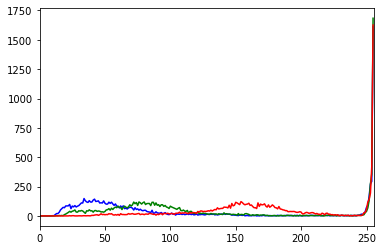

In [24]:
img = cv2.imread(img_path, -1)
color = ('b','g','r')
for channel,col in enumerate(color):
    histr = cv2.calcHist([img],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

### Original Image (24-bit Color Palette)

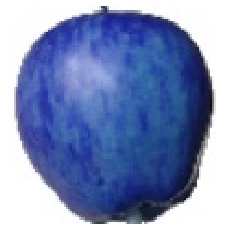

In [25]:
img = cv2.imread(img_path)
display(img)
img = np.array(img)
img = img.reshape(-1, 3)
tmp_df = pd.DataFrame(img, columns = ["r", "g", "b"])

### Original Image Color Histogram

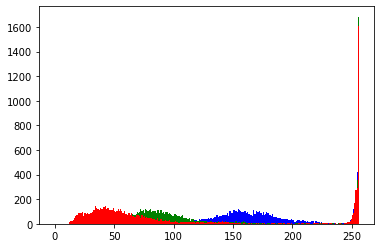

In [26]:
plt.hist(tmp_df["b"],256,[0,256], color="blue")
plt.hist(tmp_df["g"],256,[0,256], color="green")
plt.hist(tmp_df["r"],256,[0,256], color="red")
plt.show()

### New Image (6-bit Color Palette)

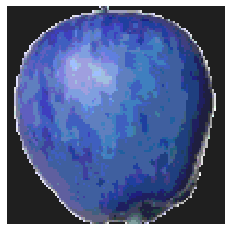

In [27]:
h = w = 100
new_img = pipeline_1d(img_path, convert_val_to_bin, 225, h, w)
new_img = new_img.reshape(h, w, 3)
display(new_img)

### Show 300 Image (24-bit Color Palette)

### Convert Image Path to OpenCV Image

In [28]:
def convert_img_path_to_cv_img(img_path_arr, threshold = 225, h = 100, w = 100):
    img_arr = []
    for img_path in img_path_arr:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (w,h),interpolation = cv2.INTER_AREA)
        img = remove_background(img, threshold)
        img_arr.append(img)
    return img_arr

### Display First 300 Images

In [29]:
def show_300(folder_path, threshold = 225, h = 100, w = 100):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    all_images = all_images[0:300]
    img_arr = convert_img_path_to_cv_img(all_images, threshold, h, w)
    plot_img_grid(img_arr, 15, 15, (10,10))

In [30]:
# for folder_path in glob('Dataset/*/'):
#     show_300(folder_path, 225, 100, 100)

### Show 300 Image (6-bit Color Palette)

### Convert Image Path to OpenCV Image

In [31]:
def convert_img_path_to_new_cv_img(img_path_arr, threshold = 225, h = 100, w = 100):
    img_arr = []
    for img_path in img_path_arr:
        new_img = pipeline_1d(img_path, convert_val_to_bin,threshold, h, w)
        new_img = new_img.reshape(h, w, 3)
        img_arr.append(new_img)
    return img_arr

### Display First 300 Images

In [32]:
def show_300_new(folder_path, threshold = 225, h = 100, w = 100):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    all_images = all_images[0:300]
    img_arr = convert_img_path_to_new_cv_img(all_images, threshold, h, w)
    plot_img_grid(img_arr, 15, 15, (10, 10))

In [33]:
# for folder_path in glob('Dataset/*/'):
#     show_300_new(folder_path, 225, 100, 100)

### New Image Color Histogram

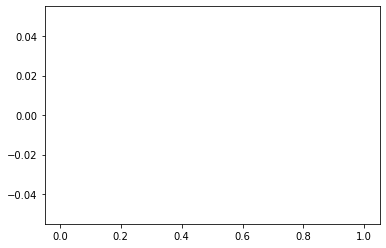

In [34]:
new_img = new_img.reshape(-1, 3)
tmp_df = pd.DataFrame(new_img, columns = ["b", "g", "r"])
plt.hist(tmp_df["b"],256,[0,1], color="blue")
plt.hist(tmp_df["g"],256,[0,1], color="green")
plt.hist(tmp_df["r"],256,[0,1], color="red")
plt.show()

## Texture Features

### Convert New Image to OpenCV Image

In [35]:
cv_img = cv2.imread(img_path)
cv_img = remove_background(cv_img, 225)

### Convert Image to GrayScale Image

In [36]:
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

In [37]:
cv_img = cv2.imread(img_path)
cv_img = remove_background(cv_img, 225)

# Convert Image to Gray Image
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

### Get Mean of Image

In [38]:
mean = np.mean(img_gray)
mean

73.6811

### Get Variance of Image

In [39]:
variance = np.var(img_gray)
variance

2850.7506027899994

### Get Entropy of Image

In [40]:
entropy = skimage.measure.shannon_entropy(img_gray)
entropy

5.987685345121102

### Get Gray Level Occurrence of Image

In [41]:
glcm = greycomatrix(img_gray, [2], [0], 256, symmetric = True, normed = True)

### Get Contrast of Image

In [42]:
contrast = greycoprops(glcm, prop="contrast").item()
contrast

1371.741020408163

### Get Homogeneity of Image

In [43]:
homogeneity = greycoprops(glcm, prop="homogeneity").item()
homogeneity

0.3144751929331963

### Get Correlation of Image

In [44]:
correlation = greycoprops(glcm, prop="correlation").item()
correlation

0.754684766980633

### Get Energy of Image

In [45]:
energy = greycoprops(glcm, prop="energy").item()
energy

0.2318352413540574

### Texture Feature Pipeline

In [46]:
def pipeline_texture(img_gray):
    tmp_dict = {}
    tmp_dict["Mean"] = np.mean(img_gray)
    tmp_dict["Variance"] = np.var(img_gray)
    tmp_dict["Entropy"] = skimage.measure.shannon_entropy(img_gray)
    glcm = greycomatrix(img_gray, [2], [0], 256, symmetric = True, normed = True)
    tmp_dict["Contrast"] = greycoprops(glcm, prop="contrast").item()
    tmp_dict["Homogeneity"] = greycoprops(glcm, prop="homogeneity").item()
    tmp_dict["Correlation"] = greycoprops(glcm, prop="correlation").item()
    tmp_dict["Energy"] = greycoprops(glcm, prop="energy").item()
    return tmp_dict

## Shape Features

In [47]:
def pipeline_shape(img_gray):
    # Apply Gaussian Blur to Image
    img_blur = cv2.GaussianBlur(img_gray, (7,7), 1)

    # Canny Edge Detection
    img_canny = cv2.Canny(img_blur, 50, 150)

    # Edge Detector
    kernel = np.ones((5, 5), dtype = np.uint8)
    img_dilate = cv2.dilate(img_canny, kernel, iterations = 1)

    contours, hier = cv2.findContours(img_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    area, peri = 0, 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        peri = cv2.arcLength(cnt, True)
    tmp_dict = {}
    tmp_dict["Area"] = area
    tmp_dict["Perimeter"] = peri
    return tmp_dict

### Gray Image

In [48]:
cv_img = cv2.imread(img_path)
cv_img = remove_background(cv_img, 225)

# Convert Image to Gray Image
img_gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)

### Get Area of Image

In [49]:
area = pipeline_shape(img_gray)["Area"]
area

753.5

### Get Perimeter of Image

In [50]:
peri = pipeline_shape(img_gray)["Perimeter"]
peri

291.6639952659607

### Update Final Dictionary

In [51]:
def pipeline_final(img_path,alpha = 1.5, beta = 0, threshold = 225, w = 100, h = 100):
    final_dict = {}
    
    cv_img = cv2.imread(img_path)
    
    # Resize Image
    cv_img = cv2.resize(cv_img, (w,h),interpolation = cv2.INTER_AREA)
    
    # Remove White Background
    cv_img = remove_background(cv_img, threshold)
    
    # Convert Image from RGB to BGR
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    
    # Get Color Features
    color_feature_dict = pipeline_color(cv_img)
    final_dict.update(color_feature_dict)
    
    # Convert Image to Gray Image
    img_gray = cv2.cvtColor(cv_img, cv2.COLOR_RGB2GRAY)

    # Get Texture Features
    texture_feature_dict = pipeline_texture(img_gray)
    final_dict.update(texture_feature_dict)

    # Get Shape Features
    shape_feature_dict = pipeline_shape(img_gray)
    final_dict.update(shape_feature_dict)
    
    return final_dict

In [52]:
pipeline_final(img_path)

{'#000000': 2679,
 '#240000': 204,
 '#242400': 26,
 '#242424': 42,
 '#400000': 209,
 '#402400': 88,
 '#402424': 136,
 '#404024': 17,
 '#404040': 40,
 '#600000': 28,
 '#602400': 485,
 '#602424': 127,
 '#604000': 15,
 '#604024': 43,
 '#604040': 88,
 '#604060': 2,
 '#606040': 10,
 '#606060': 42,
 '#800000': 1,
 '#802400': 224,
 '#802424': 337,
 '#804000': 67,
 '#804024': 1443,
 '#804040': 251,
 '#806024': 13,
 '#806040': 16,
 '#806060': 81,
 '#806080': 2,
 '#808060': 7,
 '#808080': 37,
 '#A02424': 113,
 '#A04024': 884,
 '#A04040': 261,
 '#A06024': 390,
 '#A06040': 667,
 '#A06060': 11,
 '#A08080': 42,
 '#A0A080': 7,
 '#A0A0A0': 33,
 '#A0C0A0': 1,
 '#C04040': 1,
 '#C06040': 145,
 '#C06060': 87,
 '#C08040': 10,
 '#C08060': 217,
 '#C08080': 166,
 '#C0A080': 59,
 '#C0A0A0': 33,
 '#C0A0C0': 1,
 '#C0C0A0': 4,
 '#C0C0C0': 47,
 '#C0FFC0': 1,
 '#FFA080': 17,
 '#FFA0A0': 1,
 '#FFC0C0': 39,
 '#FFFFC0': 1,
 '#FFFFFF': 2,
 'Mean': 73.6811,
 'Variance': 2850.7506027899994,
 'Entropy': 5.987685345121102,

### Get minimum number of images

In [53]:
num_image_arr = []
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    num_image_arr.append(len(all_images))
min_num_of_img = min(num_image_arr)
min_num_of_img

490

### Append To Dataframe

In [54]:
feature_arr = []

color_feature_arr = []
cc = ["00", "55", "AA", "FF"]
for i in range(4):
    for j in range(4):
        for k in range(4):
            color_feature_arr.append(f"#{cc[i]}{cc[j]}{cc[k]}")
feature_arr += color_feature_arr

texture_feature_arr = ["Mean", "Variance", "Entropy", "Contrast", "Homogeneity", "Correlation", "Energy"]
feature_arr += texture_feature_arr

shape_feature_arr = ["Area", "Perimeter"]
feature_arr += shape_feature_arr

In [55]:
feature_arr = []
# cc = ["00", "55", "AA", "FF"]
# cc = ["00", "33", "66", "99", "CC", "FF"]
cc = ["00", "24", "40", "60", "80", "A0", "C0", "FF"]
for i in cc:
    for j in cc:
        for k in cc:
            feature_arr.append(f"#{i}{j}{k}")
feature_arr += ["Mean", "Variance", "Entropy", "Contrast", "Homogeneity", "Correlation", "Energy","Area", "Perimeter"]

In [56]:
final_df = pd.DataFrame(columns = feature_arr)
final_df

,#000000,#000024,#000040,#000060,#000080,#0000A0,#0000C0,#0000FF,#002400,#002424,...,#FFFFFF,Mean,Variance,Entropy,Contrast,Homogeneity,Correlation,Energy,Area,Perimeter


### Generate CSV (Color, Texture and Shape Features)

In [57]:
threshold = 225
h = w = 100
for folder_path in glob('Dataset/*/'):
    folder_name = folder_path.split("\\")[1]
    all_images = glob(folder_path + "*.jpg")
    all_images = all_images[0:min_num_of_img]
    for img_path in all_images:
        feature_dict = pipeline_final(img_path, threshold, h, w)
        final_df = final_df.append(feature_dict, ignore_index = True)

### Fill in Nan Values

In [58]:
final_df.fillna(0, inplace=True)

### Add Label

In [59]:
folder_name_arr = [folder_path.split("\\")[1] for folder_path in glob('Dataset/*/')]
label_arr = list(itertools.chain.from_iterable(itertools.repeat(x, min_num_of_img) for x in folder_name_arr))

In [60]:
final_df["Label"] = label_arr

### Shuffle Dataset

In [61]:
df = final_df

In [62]:
df = df.sample(frac=1).reset_index(drop=True)

### Output CSV

In [63]:
df.to_csv("Image_Dataset_Color_Texture_Shape_Features.csv", index = False)

### Generate CSV (After Color Discretization)

In [64]:
# all_img_arr = []
# h = w = 100
# for folder_path in glob('Dataset/*/'):
#     folder_name = folder_path.split("\\")[1]
#     all_images = glob(folder_path + "*.jpg")
#     all_images = all_images[0:min_num_of_img]
#     for img_path in all_images:
#         img = Image.open(img_path)
#         # Get Hex Value Only
#         new_img = pipeline_1d(img, convert_val_to_bin, h, w)
#         all_img_arr.append(new_img)

In [65]:
# df = pd.DataFrame(all_img_arr)
# df.rename(columns={i:f'Pixel {i}' for i in range(h * w *3)}, inplace = True)
# folder_name_arr = [folder_path.split("\\")[1] for folder_path in glob('Dataset/*/')]
# label_arr = list(itertools.chain.from_iterable(itertools.repeat(x, min_num_of_img) for x in folder_name_arr))
# df["Label"] = label_arr

In [66]:
# # Shuffle Dataset
# df = df.sample(frac=1).reset_index(drop=True)

In [67]:
# df.to_csv("Image_Dataset_Color_Features_Float.csv")